In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


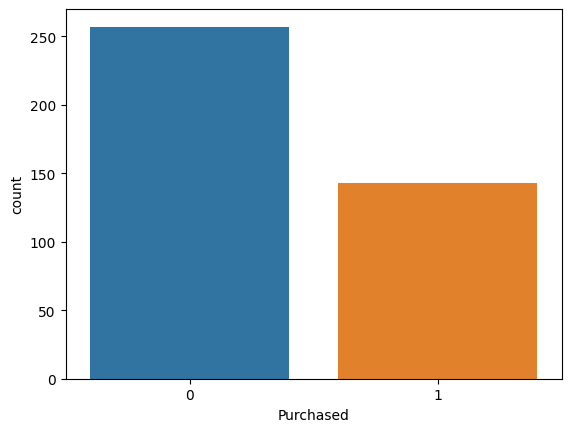

In [3]:
sns.countplot(data=df, x="Purchased")
plt.show()

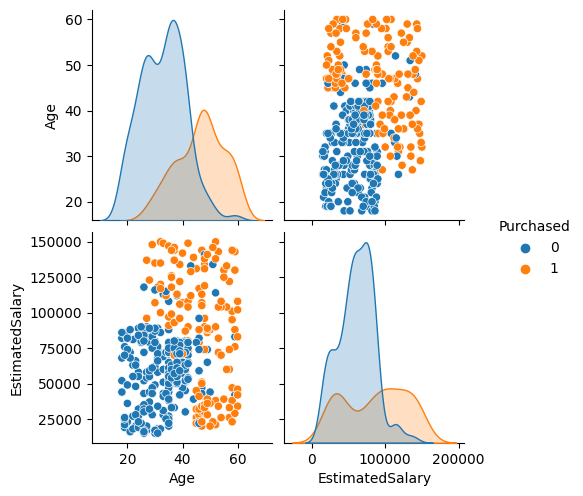

In [4]:
sns.pairplot(data=df, hue="Purchased")
plt.show()

In [5]:
df.describe().round(2)

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


In [6]:
X = df.drop(["Purchased"], axis=1).values
y = df["Purchased"].values

scale = StandardScaler()
X_norm = scale.fit_transform(X)

print(f"X shape: {X_norm.shape}")
print(f"y shape: {y.shape}")

X shape: (400, 2)
y shape: (400,)


In [12]:
def scoring_function(clf, X, y):
    pred = clf.predict(X)
    pre = metrics.precision_score(y_true=y, y_pred=pred, average="binary", zero_division=0),
    re = metrics.recall_score(y_true=y, y_pred=pred, average="binary", zero_division=0)
    f1 = metrics.f1_score(y_true=y, y_pred=pred, average="binary", zero_division=0)

    return {
        'pre': pre[0],
        're': re,
        'f1': f1
    }

model = SVC(random_state=42)
params = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'], 
    'kernel': ['rbf', "linear", "poly"],
    'class_weight': [None, 'balanced'] 
}

grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring_function, n_jobs=1, verbose=1, cv=5, refit="f1")

grid.fit(X_norm, y)
print(f"The best params: {grid.best_params_}")
print(f"The best score: {grid.best_score_}")

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
The best params: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
The best score: 0.8757878151260504
